Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform statistical analysis, and generate visual insights to help the
business make informed decisions.

Part I: Randomized Sales Data Generation (NumPy)

1. Initialize Random Seed

2. Generate Sales Data

* Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:

* Electronics, Clothing, Home & Kitchen, Sports.

* Sales values should be between 1000 and 5000 units per month.

* The range should be randomized using the seed.

3. Convert to DataFrame
* Convert the cleaned NumPy array into a Pandas DataFrame with:

    i. Columns: Electronics, Clothing, Home & Kitchen, Sports

    ii. Index: Months from Jan to Dec


In [3]:
import numpy as np
import pandas as pd

roll_number = 102497017
np.random.seed(roll_number)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
categories = ["Electronics", "Clothing", "Home & Kitchen", "Sports"]

sales_data = np.random.randint(1000, 5001, size=(12, 4))

sales_df = pd.DataFrame(sales_data, columns=categories, index=months)

print(sales_df)
sales_df.shape

     Electronics  Clothing  Home & Kitchen  Sports
Jan         4134      1522            2003    3628
Feb         4834      2819            2576    1939
Mar         1620      3258            3170    2090
Apr         1484      3642            3570    3364
May         1683      1245            3781    1606
Jun         2003      1031            2730    3040
Jul         3555      2606            4354    3100
Aug         3241      3408            1831    2152
Sep         1422      1076            4381    1455
Oct         1192      1459            3644    2579
Nov         3280      4914            1960    2982
Dec         3793      4394            4579    3838


(12, 4)

Part II: Data ManipulaƟon and Analysis (Pandas)

1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.

2. Calculate the total sales per category and total sales per month.

3. Calculate the average sales growth between consecuƟve months for each category.

4. Add the following columns to the DataFrame:

* Total Sales: Sum of all categories per month.

* Growth Rate: Percentage change in Total Sales from the previous month.

5. Apply a randomized discount:

* If your roll number is even, apply a 10% discount to the Electronics category.


* If odd, apply a 15% discount to the Clothing category.

In [4]:
print(sales_df.head())
print(sales_df.describe())

category_totals = sales_df.sum()
monthly_totals = sales_df.sum(axis=1)

growth_rates = sales_df.pct_change().mean()

sales_df["Total Sales"] = monthly_totals
sales_df["Growth Rate"] = sales_df["Total Sales"].pct_change() * 100

roll_number = int(input("Enter your roll number: "))
if roll_number % 2 == 0:
    sales_df["Electronics"] *= 0.9
else:
    sales_df["Clothing"] *= 0.85

print(sales_df)

     Electronics  Clothing  Home & Kitchen  Sports
Jan         4134      1522            2003    3628
Feb         4834      2819            2576    1939
Mar         1620      3258            3170    2090
Apr         1484      3642            3570    3364
May         1683      1245            3781    1606
       Electronics     Clothing  Home & Kitchen       Sports
count    12.000000    12.000000       12.000000    12.000000
mean   2686.750000  2614.500000     3214.916667  2647.750000
std    1251.742867  1344.159927      988.699371   793.869365
min    1192.000000  1031.000000     1831.000000  1455.000000
25%    1586.000000  1405.500000     2432.750000  2052.250000
50%    2622.000000  2712.500000     3370.000000  2780.500000
75%    3614.500000  3466.500000     3924.250000  3166.000000
max    4834.000000  4914.000000     4579.000000  3838.000000
Enter your roll number: 102497017
     Electronics  Clothing  Home & Kitchen  Sports  Total Sales  Growth Rate
Jan         4134   1293.70        

Part III: VisualizaƟons (Matplotlib and Seaborn)

1. Plot monthly sales trends for each category using line plots.

2. Create the following plots:

* Box plots to show the sales distribuƟon for each category.

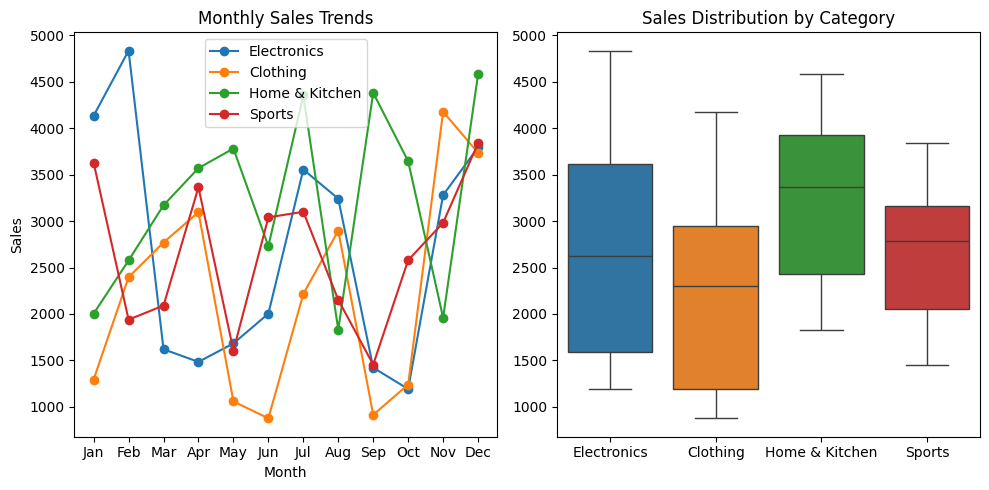

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for category in categories:
    axes[0].plot(sales_df.index, sales_df[category], marker='o', label=category)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Sales')
axes[0].set_title('Monthly Sales Trends')
axes[0].legend()

sns.boxplot(data=sales_df[categories], ax=axes[1])
axes[1].set_title('Sales Distribution by Category')

plt.tight_layout()
plt.show()

Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])

i. Find element-wise absolute value

In [6]:
array = np.array([[1, -2, 3], [-4, 5, -6]])
absolute_array = np.abs(array)
print(absolute_array)

[[1 2 3]
 [4 5 6]]


ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.

In [7]:
array = np.array([[1, -2, 3], [-4, 5, -6]])

flattened_array = array.flatten()

# Calculate percentiles of the flattened array
percentile_25 = np.percentile(flattened_array, 25)
percentile_50 = np.percentile(flattened_array, 50)  # Median
percentile_75 = np.percentile(flattened_array, 75)

# Output for the flattened array
print(f"25th percentile (flattened array): {percentile_25}")
print(f"50th percentile (flattened array - median): {percentile_50}")
print(f"75th percentile (flattened array): {percentile_75}")

# For each column
percentile_25_column = np.percentile(array, 25, axis=0)
percentile_50_column = np.percentile(array, 50, axis=0)  # Median for columns
percentile_75_column = np.percentile(array, 75, axis=0)

# Output for each column
print("\nPercentiles for each column:")
print(f"25th percentile (per column): {percentile_25_column}")
print(f"50th percentile (per column - median): {percentile_50_column}")
print(f"75th percentile (per column): {percentile_75_column}")

# For each row
percentile_25_row = np.percentile(array, 25, axis=1)
percentile_50_row = np.percentile(array, 50, axis=1)  # Median for rows
percentile_75_row = np.percentile(array, 75, axis=1)

# Output for each row
print("\nPercentiles for each row:")
print(f"25th percentile (per row): {percentile_25_row}")
print(f"50th percentile (per row - median): {percentile_50_row}")
print(f"75th percentile (per row): {percentile_75_row}")


25th percentile (flattened array): -3.5
50th percentile (flattened array - median): -0.5
75th percentile (flattened array): 2.5

Percentiles for each column:
25th percentile (per column): [-2.75 -0.25 -3.75]
50th percentile (per column - median): [-1.5  1.5 -1.5]
75th percentile (per column): [-0.25  3.25  0.75]

Percentiles for each row:
25th percentile (per row): [-0.5 -5. ]
50th percentile (per row - median): [ 1. -4.]
75th percentile (per row): [2.  0.5]


iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row

In [8]:
import numpy as np

# Given array
array = np.array([[1, -2, 3], [-4, 5, -6]])

# Flatten the array
flattened_array = array.flatten()

# Calculate mean, median, and standard deviation of the flattened array
mean_flattened = np.mean(flattened_array)
median_flattened = np.median(flattened_array)
std_flattened = np.std(flattened_array)

# Output for the flattened array
print(f"Mean (flattened array): {mean_flattened}")
print(f"Median (flattened array): {median_flattened}")
print(f"Standard Deviation (flattened array): {std_flattened}")

# For each column
mean_column = np.mean(array, axis=0)
median_column = np.median(array, axis=0)
std_column = np.std(array, axis=0)

# Output for each column
print("\nMean, Median, and Standard Deviation for each column:")
print(f"Mean (per column): {mean_column}")
print(f"Median (per column): {median_column}")
print(f"Standard Deviation (per column): {std_column}")

# For each row
mean_row = np.mean(array, axis=1)
median_row = np.median(array, axis=1)
std_row = np.std(array, axis=1)

# Output for each row
print("\nMean, Median, and Standard Deviation for each row:")
print(f"Mean (per row): {mean_row}")
print(f"Median (per row): {median_row}")
print(f"Standard Deviation (per row): {std_row}")


Mean (flattened array): -0.5
Median (flattened array): -0.5
Standard Deviation (flattened array): 3.8622100754188224

Mean, Median, and Standard Deviation for each column:
Mean (per column): [-1.5  1.5 -1.5]
Median (per column): [-1.5  1.5 -1.5]
Standard Deviation (per column): [2.5 3.5 4.5]

Mean, Median, and Standard Deviation for each row:
Mean (per row): [ 0.66666667 -1.66666667]
Median (per row): [ 1. -4.]
Standard Deviation (per row): [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).

i. Find floor, ceiling and truncated value, rounded values

In [9]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

floor_values = np.floor(a)
ceiling_values = np.ceil(a)
truncated_values = np.trunc(a)
rounded_values = np.round(a)

print("Floor Values:", floor_values)
print("Ceiling Values:", ceiling_values)
print("Truncated Values:", truncated_values)
print("Rounded Values:", rounded_values)

Floor Values: [-2. -2. -1.  0.  1.  1.  3.]
Ceiling Values: [-1. -1. -0.  1.  2.  2.  3.]
Truncated Values: [-1. -1. -0.  0.  1.  1.  3.]
Rounded Values: [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [10]:
def swap_list_elements(lst, idx1, idx2):
    temp = lst[idx1]
    lst[idx1] = lst[idx2]
    lst[idx2] = temp
    return lst

list_example = [1, 2, 3, 4, 5]
swapped_list = swap_list_elements(list_example, 1, 3)
print("Swapped List:", swapped_list)

Swapped List: [1, 4, 3, 2, 5]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [11]:
def swap_set_elements(s, elem1, elem2):
    lst = list(s)
    idx1, idx2 = lst.index(elem1), lst.index(elem2)
    lst[idx1], lst[idx2] = lst[idx2], lst[idx1]
    return set(lst)

set_example = {10, 20, 30, 40, 50}
swapped_set = swap_set_elements(set_example, 20, 40)
print("Swapped Set:", swapped_set)

Swapped Set: {40, 10, 50, 20, 30}
